<a href="https://colab.research.google.com/github/FelipeErmeson/churn-prediction-telecommunications/blob/main/Analise_de_Dados_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
<img alt="Colaboratory logo" width="30%" src="https://raw.githubusercontent.com/FelipeErmeson/Data-Science-Projects/b35dcf53814c50c86f65de7628483151404026a7/logotipo.svg">

*by [Felipe Lima](https://www.linkedin.com/in/felipe-ermeson-b484bb128/)*

---

# **Predição de Cliente Churn**

Entender o por quê seus clientes estão abandonando seus produtos ou serviços é crucial para a saúde financeira da empresa. O **Churn** ou **Churn rate** representa a taxa de evasão da base de clientes em um período determinado. 

O Churn é um sintoma e não uma doença. Serve justamente para mostrar que existe algum problema que deve ser atacado. Existem causas que são **externas** como o fluxo de caixa do cliente diminuiu, ou faliu, entre outros fatores. Mas existem problemas que são **internos** e que temos o controle, como uma experiência ruim do usuário, ou o preço está muito caro para o valor entregado.

**Detectar** esses potenciais churn antes deles saírem, e promover ações direcionadas para tentar reter tais clientes, pode ser um diferencial e uma virada de chave da empresa.

O Custo de Aquisição de Cliente (CAC) é geralmente mais alto que o custo para mantê-los, ou seja, altos valores de **churn rate** é muito ruim.

<p align=center>
<img src="https://img.freepik.com/free-vector/generating-new-leads-concept-illustration_114360-7394.jpg?w=1380&t=st=1665601222~exp=1665601822~hmac=09e508d79ac23e31c8e00c971f54a6b1cf6d7e758d791283f2d83c406092f293" width="60%"></p>

Este notebook irá realizar uma **análise exploratória dos dados** disponibilizados por uma empresa anônima de telecomunicações.

## **Aquisição dos Dados**

Os dados analisados neste projeto foram originalmente disponibilizados na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#), e trata-se de um problema típico de uma companhia de telecomunicações. O *dataset* completo pode ser encontrado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).

Não foi disponibilizado o que cada coluna significa, mas pelo nome podemos ter uma ideia do que seja.

In [ ]:
!pip install matplotlib==3.5.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 2.2 MB/s 
     |████████████████████████████████| 960 kB 49.4 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


### **Importando bibliotecas**

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### **Importando o dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# importando os dados
DATA_PATH = "/content/drive/MyDrive/Datasets/telco_customer_churn/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(DATA_PATH)

# mostrar todas as colunas
pd.options.display.max_columns = None

# ver as 5 primeiras entradas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### **Dicionário de dados**

**customerID** - Identificador do cliente (assinante)

**gender** - Gênero sexual

**SeniorCitizen** - Se o cliente é Idoso ou não (1, 0)

**Partner** - Se o cliente tem um parceiro ou não (Yes, No)

**Dependents** - Se o cliente tem dependentes ou não (Yes, No)

**tenure** - Número de meses que o cliente permaneceu na empresa

**PhoneService** - Se o cliente têm atendimento telefônico ou não (Yes, No)

**MultipleLines** - Se o cliente possui várias linhas ou não (Yes, No, No phone service)

**InternetService** - Tipo de provedor de internet do cliente (DSL, Fiber optic, No)

**OnlineSecurity** - Se o cliente possui segurança online ou não (Yes, No, No internet service)

**OnlineBackup** - Se o cliente possui backup online ou não (Yes, No, No internet service)

**DeviceProtection** - Se o cliente possui proteção do dispositivo ou não (Yes, No, No internet service)

**TechSupport** - Se o cliente possui suporte técnico ou não (Yes, No, No internet service)

**StreamingTV** - Se o cliente possui streaming para TV ou não (Yes, No, No internet service)

**StreamingMovies** - Se o cliente possui streaming para filmes ou não (Yes, No, No internet service)

**Contract** - O prazo do contrato do cliente (Month-to-month, One year, Two year)

**PaperlessBilling** - Se o cliente possui faturamento sem papel ou não (Yes, No)

**PaymentMethod** - Forma de pagamento do cliente (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

**MonthlyCharges** - Valor cobrado do cliente mensalmente

**TotalCharges** - Valor total cobrado do cliente

**Churn** - Se o cliente é churn ou não

## **Análise Exploratória de Dados**

**Variáveis categóricas**



### **Informações básicas**

In [4]:
print("Linhas:", df.shape[0])
print("Colunas:", df.shape[1])

Linhas: 7043
Colunas: 21


In [5]:
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [6]:
print("Quantidade de IDs únicos:", len(df.customerID.unique()))

Quantidade de IDs únicos: 7043


In [7]:
# Verificando se existem linhas duplicadas
df[df.duplicated()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [8]:
# Verificando a quantidade de valores distintos da minha variável alvo
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [9]:
# Verificando o tipo de cada recurso
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [10]:
# Verificando se alguma coluna possui valores nulos
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### **Qual a distribuição da classe *churn*?**

In [11]:
def change_width(ax, new_value):
  for patch in ax.patches :
    current_width = patch.get_width()
    diff = current_width - new_value
    # altera a largura das barras
    patch.set_width(new_value)
    # centraliza o label no eixo x
    patch.set_x(patch.get_x() + diff * .5)

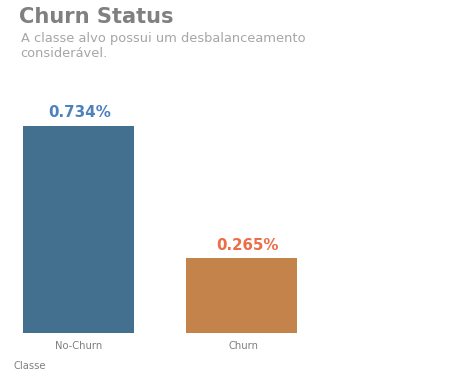

In [12]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(x='Churn', data=df, saturation=0.5, ax=ax)
ax.text(-0.44, 6900,'A classe alvo possui um desbalanceamento\nconsiderável.', fontsize=13, color="#A6A6A6")
ax.set_title('Churn Status', color='#808080', x=0.2, y=1.4, size=21, fontweight='semibold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(colors="#808080", bottom=False, labelleft=False, left=False)
ax.set_xlabel(xlabel='Classe', x=0.05, labelpad=10, color='#808080')
ax.get_yaxis().set_visible(False)
ax.set_xticklabels(['No-Churn', 'Churn'])
change_width(ax, 0.5)
# definindo a coordenada das barras, para reduzir o espaço entre as barras
ax.patches[0].set_x(-0.43)
ax.patches[1].set_x(0.3)
# definindo a coordenada do rótulo das barras
ax.set_xticks([-0.18, 0.56])

ax.annotate(
    str(df.Churn.value_counts(normalize=True)[0])[:5]+"%",
    xy=(-0.45, 5400),
    xytext=(30,0),
    textcoords='offset points',
    color="#4F81BD",
    fontsize=15,
    fontweight='semibold'
            )

ax.annotate(
    str(df.Churn.value_counts(normalize=True)[1])[:5]+"%",
    xy=(0.3, 2100),
    xytext=(30,0),
    textcoords='offset points',
    color="#ED6D47",
    fontsize=15,
    fontweight='semibold'
            )
plt.show()

### **Qual a distribuição da classe *sexo*?**

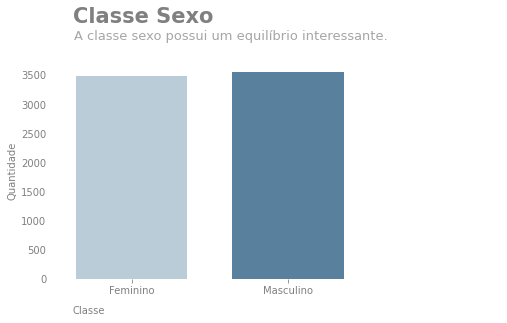

In [13]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(x='gender', data=df, ax=ax, saturation=0.5, palette='Blues')
ax.set_title('Classe Sexo', color='#808080', x=0.2, y=1.15, size=21, fontweight='semibold')
ax.text(-0.41, 4100,'A classe sexo possui um equilíbrio interessante.', fontsize=13, color="#A6A6A6")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
for bar in ax.patches:
  x = bar.get_x()
  width = bar.get_width()
  centre = x + width/2.
  bar.set_x(centre - 0.5/2.)
  bar.set_width(0.5)

ax.patches[0].set_x(-0.4)
ax.patches[1].set_x(0.3)
ax.set_xticks([-0.15, 0.55])

ax.set_xticklabels(['Feminino', 'Masculino'])
ax.tick_params(colors="#808080", left=False)
ax.set_xlabel(xlabel='Classe', x=0.08, labelpad=10, color='#808080')
ax.set_ylabel('Quantidade', color='#808080')
plt.show()

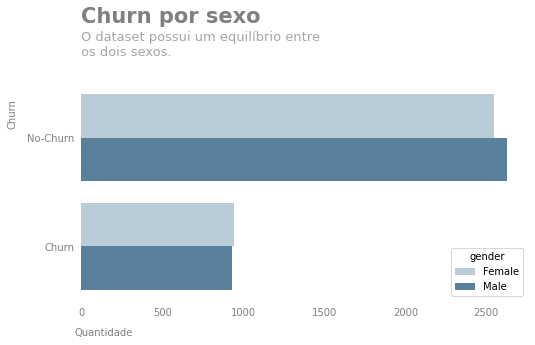

In [14]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(y='Churn', hue='gender', data=df, saturation=0.5, palette='Blues', ax=ax)
ax.set_title('Churn por sexo', color='#808080', x=0.2, y=1.25, size=21, fontweight='semibold')
ax.text(-0.44, -0.75,'O dataset possui um equilíbrio entre\nos dois sexos.', fontsize=13, color="#A6A6A6")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(colors="#808080", bottom=False, left=False)
ax.set_yticklabels(['No-Churn', 'Churn'])
ax.set_ylabel(ylabel='Churn', y=0.86, labelpad=10, color="#808080")
ax.set_xlabel(xlabel='Quantidade', x=0.05, labelpad=10, color='#808080')
plt.show()

### **Qual a distribuição da classe *idoso*?**

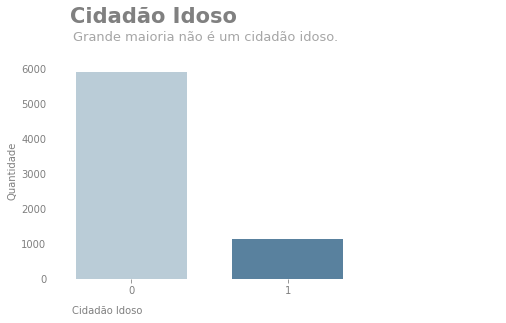

In [15]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(x='SeniorCitizen', data=df, ax=ax, saturation=0.5, palette='Blues')
ax.set_title('Cidadão Idoso', color='#808080', x=0.225, y=1.15, size=21, fontweight='semibold')
ax.text(-0.41, 6800,'Grande maioria não é um cidadão idoso.', fontsize=13, color="#A6A6A6")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
for bar in ax.patches:
  x = bar.get_x()
  width = bar.get_width()
  centre = x + width/2.
  bar.set_x(centre - 0.5/2.)
  bar.set_width(0.5)

ax.patches[0].set_x(-0.4)
ax.patches[1].set_x(0.3)
ax.set_xticks([-0.15, 0.55])

ax.set_xticklabels(['0', '1'])
ax.tick_params(colors="#808080", left=False)
ax.set_xlabel(xlabel='Cidadão Idoso', x=0.12, labelpad=10, color='#808080')
ax.set_ylabel('Quantidade', color='#808080')
plt.show()

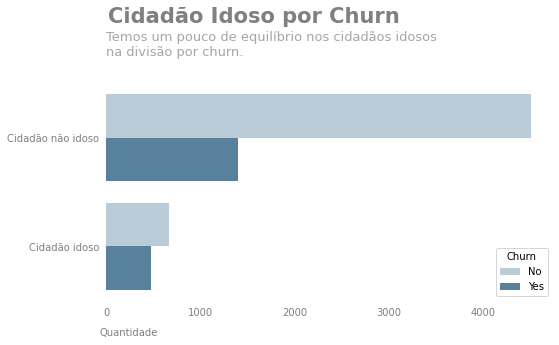

In [16]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(y='SeniorCitizen', data=df, saturation=0.5, palette='Blues', hue='Churn', ax=ax, order=df.SeniorCitizen.value_counts().index)
ax.set_title('Cidadão Idoso por Churn', color='#808080', x=0.33, y=1.25, size=21, fontweight='semibold')
ax.text(0, -0.75,'Temos um pouco de equilíbrio nos cidadãos idosos\nna divisão por churn.', fontsize=13, color="#A6A6A6")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(colors="#808080", bottom=False, left=False)
ax.set_yticklabels(['Cidadão não idoso', 'Cidadão idoso'])
ax.set_ylabel(ylabel='Cidadão Idoso', visible=False, y=0.86, labelpad=10, color="#808080")
ax.set_xlabel(xlabel='Quantidade', x=0.05, labelpad=10, color='#808080')
plt.show()

### **Qual a distribuição da classe *parceiro*?**

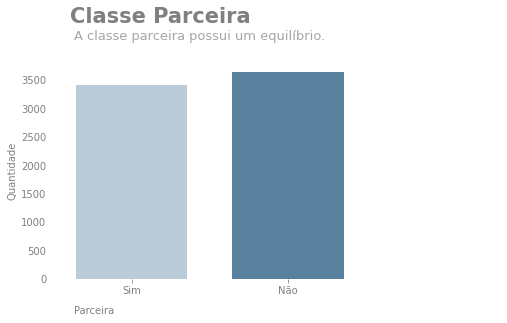

In [17]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(x='Partner', data=df, ax=ax, saturation=0.5, palette='Blues')
ax.set_title('Classe Parceira', color='#808080', x=0.24, y=1.15, size=21, fontweight='semibold')
ax.text(-0.41, 4200,'A classe parceira possui um equilíbrio.', fontsize=13, color="#A6A6A6")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
for bar in ax.patches:
  x = bar.get_x()
  width = bar.get_width()
  centre = x + width/2.
  bar.set_x(centre - 0.5/2.)
  bar.set_width(0.5)

ax.patches[0].set_x(-0.4)
ax.patches[1].set_x(0.3)
ax.set_xticks([-0.15, 0.55])

ax.set_xticklabels(['Sim', 'Não'])
ax.tick_params(colors="#808080", left=False)
ax.set_xlabel(xlabel='Parceira', x=0.09, labelpad=10, color='#808080')
ax.set_ylabel('Quantidade', color='#808080')
plt.show()

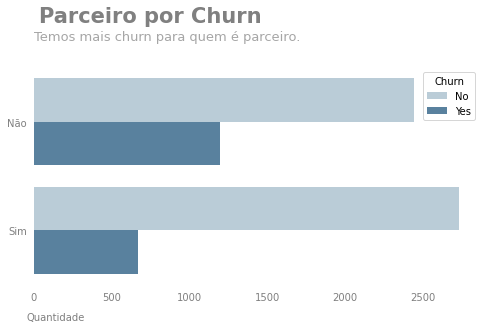

In [18]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(y='Partner', data=df, saturation=0.5, palette='Blues', hue='Churn', ax=ax, order=df.Partner.value_counts().index)
ax.set_title('Parceiro por Churn', color='#808080', x=0.26, y=1.18, size=21, fontweight='semibold')
ax.text(0, -0.75,'Temos mais churn para quem é parceiro.', fontsize=13, color="#A6A6A6")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(colors="#808080", bottom=False, left=False)
ax.set_yticklabels(['Não', 'Sim'])
ax.set_ylabel(ylabel='Parceiro', visible=False, y=0.86, labelpad=10, color="#808080")
ax.set_xlabel(xlabel='Quantidade', x=0.05, labelpad=10, color='#808080')
plt.show()

### **Qual a distribuição da classe *dependentes*?**

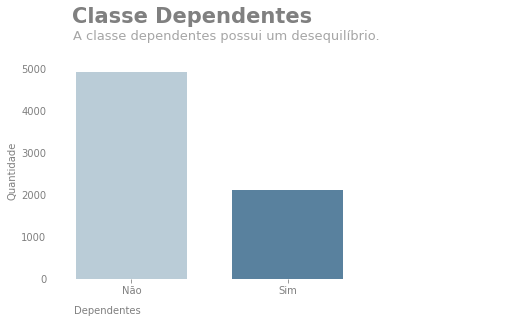

In [19]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(x='Dependents', data=df, ax=ax, saturation=0.5, palette='Blues')
ax.set_title('Classe Dependentes', color='#808080', x=0.31, y=1.15, size=21, fontweight='semibold')
ax.text(-0.41, 5700,'A classe dependentes possui um desequilíbrio.', fontsize=13, color="#A6A6A6")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
for bar in ax.patches:
  x = bar.get_x()
  width = bar.get_width()
  centre = x + width/2.
  bar.set_x(centre - 0.5/2.)
  bar.set_width(0.5)

ax.patches[0].set_x(-0.4)
ax.patches[1].set_x(0.3)
ax.set_xticks([-0.15, 0.55])

ax.set_xticklabels(['Não', 'Sim'])
ax.tick_params(colors="#808080", left=False)
ax.set_xlabel(xlabel='Dependentes', x=0.12, labelpad=10, color='#808080')
ax.set_ylabel('Quantidade', color='#808080')
plt.show()

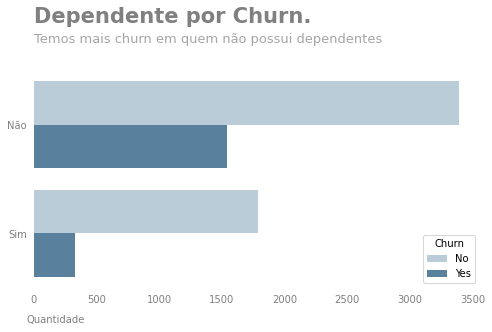

In [20]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(y='Dependents', data=df, saturation=0.5, palette='Blues', hue='Churn', ax=ax, order=df.Dependents.value_counts().index)
ax.set_title('Dependente por Churn.', color='#808080', x=0.31, y=1.19, size=21, fontweight='semibold')
ax.text(0, -0.75,'Temos mais churn em quem não possui dependentes', fontsize=13, color="#A6A6A6")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(colors="#808080", bottom=False, left=False)
ax.set_yticklabels(['Não', 'Sim'])
ax.set_ylabel(ylabel='Dependente', visible=False, y=0.86, labelpad=10, color="#808080")
ax.set_xlabel(xlabel='Quantidade', x=0.05, labelpad=10, color='#808080')
plt.show()

### **Qual a distribuição da classe *faturamento sem papel*?**

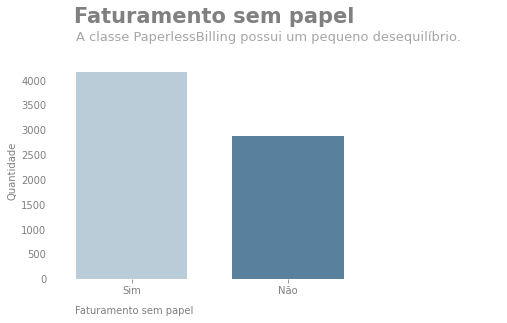

In [21]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(x='PaperlessBilling', data=df, ax=ax, saturation=0.5, palette='Blues')
ax.set_title('Faturamento sem papel', color='#808080', x=0.36, y=1.15, size=21, fontweight='semibold')
ax.text(-0.4, 4800,'A classe PaperlessBilling possui um pequeno desequilíbrio.', fontsize=13, color="#A6A6A6")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
for bar in ax.patches:
  x = bar.get_x()
  width = bar.get_width()
  centre = x + width/2.
  bar.set_x(centre - 0.5/2.)
  bar.set_width(0.5)

ax.patches[0].set_x(-0.4)
ax.patches[1].set_x(0.3)
ax.set_xticks([-0.15, 0.55])

ax.set_xticklabels(['Sim', 'Não'])
ax.tick_params(colors="#808080", left=False)
ax.set_xlabel(xlabel='Faturamento sem papel', x=0.18, labelpad=10, color='#808080')
ax.set_ylabel('Quantidade', color='#808080')
plt.show()

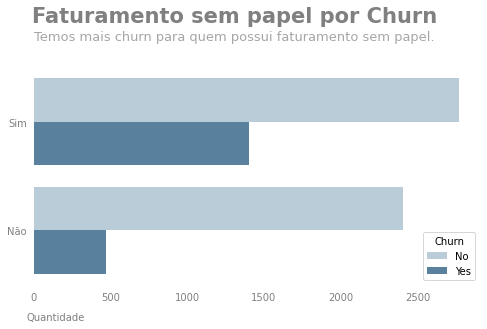

In [22]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(y='PaperlessBilling', data=df, saturation=0.5, palette='Blues', hue='Churn', ax=ax, order=df.PaperlessBilling.value_counts().index)
ax.set_title('Faturamento sem papel por Churn', color='#808080', x=0.45, y=1.18, size=21, fontweight='semibold')
ax.text(0, -0.75,'Temos mais churn para quem possui faturamento sem papel.', fontsize=13, color="#A6A6A6")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(colors="#808080", bottom=False, left=False)
ax.set_yticklabels(['Sim', 'Não'])
ax.set_ylabel(ylabel='Faturamento sem papel', visible=False, y=0.86, labelpad=10, color="#808080")
ax.set_xlabel(xlabel='Quantidade', x=0.05, labelpad=10, color='#808080')
plt.show()

### **Qual a distribuição da classe *serviço de telefonia*?**

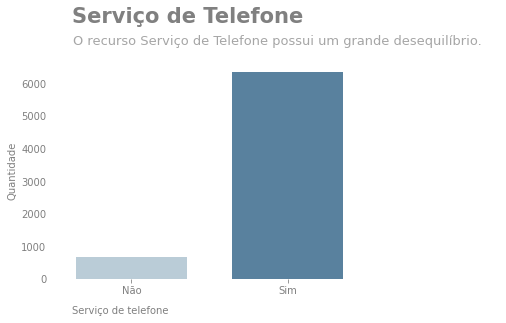

In [23]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(x='PhoneService', data=df, ax=ax, saturation=0.5, palette='Blues')
ax.set_title('Serviço de Telefone', color='#808080', x=0.30, y=1.15, size=21, fontweight='semibold')
ax.text(-0.41, 7200,'O recurso Serviço de Telefone possui um grande desequilíbrio.', fontsize=13, color="#A6A6A6")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
for bar in ax.patches:
  x = bar.get_x()
  width = bar.get_width()
  centre = x + width/2.
  bar.set_x(centre - 0.5/2.)
  bar.set_width(0.5)

ax.patches[0].set_x(-0.4)
ax.patches[1].set_x(0.3)
ax.set_xticks([-0.15, 0.55])

ax.set_xticklabels(['Não', 'Sim'])
ax.tick_params(colors="#808080", left=False)
ax.set_xlabel(xlabel='Serviço de telefone', x=0.15, labelpad=10, color='#808080')
ax.set_ylabel('Quantidade', color='#808080')
plt.show()

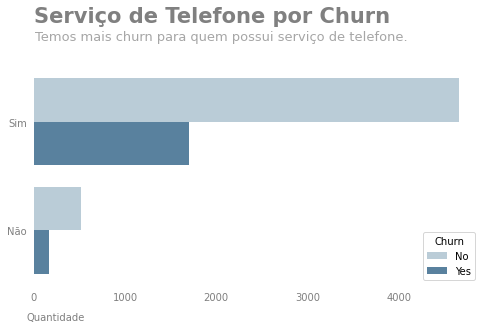

In [24]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(y='PhoneService', data=df, saturation=0.5, palette='Blues', hue='Churn', ax=ax, order=df.PhoneService.value_counts().index)
ax.set_title('Serviço de Telefone por Churn', color='#808080', x=0.40, y=1.18, size=21, fontweight='semibold')
ax.text(10, -0.75,'Temos mais churn para quem possui serviço de telefone.', fontsize=13, color="#A6A6A6")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(colors="#808080", bottom=False, left=False)
ax.set_yticklabels(['Sim', 'Não'])
ax.set_ylabel(ylabel='Serviço de Telefone', visible=False, y=0.86, labelpad=10, color="#808080")
ax.set_xlabel(xlabel='Quantidade', x=0.05, labelpad=10, color='#808080')
plt.show()

### **Qual a distribuição da classe *múltiplas linhas*?**

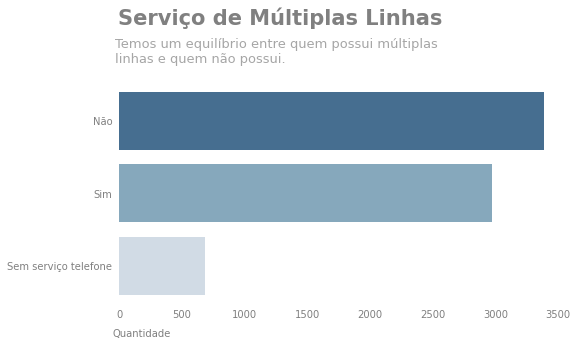

In [25]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(y='MultipleLines', data=df, saturation=0.5, order=df.MultipleLines.value_counts().index, palette='Blues_r', ax=ax)
ax.set_title('Serviço de Múltiplas Linhas', color='#808080', x=0.36, y=1.25, size=21, fontweight='semibold')
ax.text(-35, -0.80,'Temos um equilíbrio entre quem possui múltiplas\nlinhas e quem não possui.', fontsize=13, color="#A6A6A6")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(colors="#808080", bottom=False, left=False)
ax.set_yticklabels(['Não', 'Sim', 'Sem serviço telefone'])
ax.set_ylabel(ylabel='Múltiplas Linhas', visible=False, labelpad=10, color="#808080", y=0.75)
ax.set_xlabel(xlabel='Quantidade', x=0.05, labelpad=10, color='#808080')
plt.show()

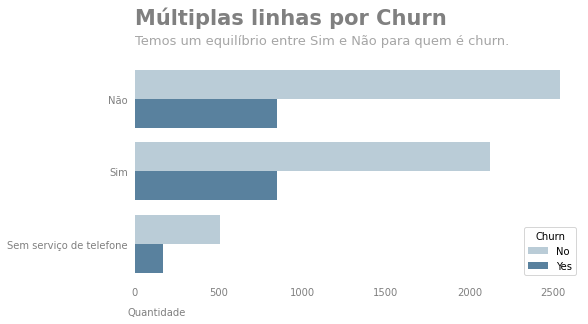

In [26]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(y='MultipleLines', data=df, saturation=0.5, palette='Blues', hue='Churn', ax=ax, order=df.MultipleLines.value_counts().index)
ax.set_title('Múltiplas linhas por Churn', color='#808080', x=0.35, y=1.15, size=21, fontweight='semibold')
ax.text(0, -0.75,'Temos um equilíbrio entre Sim e Não para quem é churn.', fontsize=13, color="#A6A6A6")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(colors="#808080", bottom=False, left=False)
ax.set_yticklabels(['Não', 'Sim', 'Sem serviço de telefone'])
ax.set_ylabel(ylabel='Múltiplas Linhas', visible=False, y=0.86, labelpad=10, color="#808080")
ax.set_xlabel(xlabel='Quantidade', x=0.05, labelpad=10, color='#808080')
plt.show()

### **Qual a distribuição da classe *serviço de internet*?**

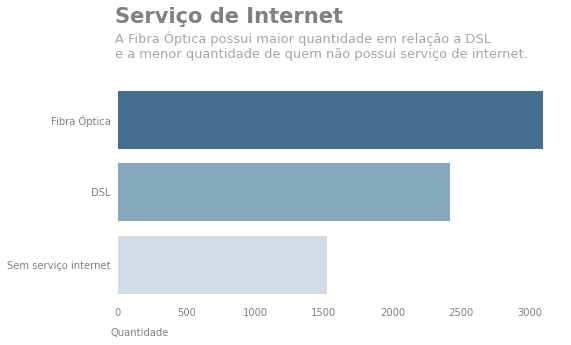

In [27]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(y='InternetService', data=df, saturation=0.5, order=df.InternetService.value_counts().index, palette='Blues_r', ax=ax)
ax.set_title('Serviço de Internet', color='#808080', x=0.25, y=1.25, size=21, fontweight='semibold')
ax.text(-18, -0.85,'A Fibra Óptica possui maior quantidade em relação a DSL\ne a menor quantidade de quem não possui serviço de internet.', fontsize=13, color="#A6A6A6")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(colors="#808080", bottom=False, left=False)
ax.set_yticklabels(['Fibra Óptica', 'DSL', 'Sem serviço internet'])
ax.set_ylabel(ylabel='Serviço Internet', y=0.75, visible=False, labelpad=10, color="#808080")
ax.set_xlabel(xlabel='Quantidade', x=0.05, labelpad=10, color='#808080')
plt.show()

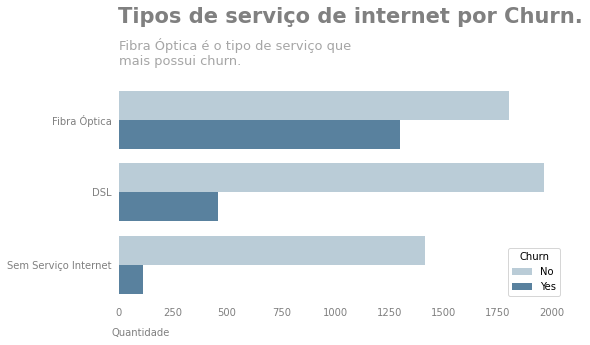

In [28]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(y='InternetService', data=df, saturation=0.5, palette='Blues', hue='Churn', ax=ax, order=df.InternetService.value_counts().index)
ax.set_title('Tipos de serviço de internet por Churn.', color='#808080', x=0.52, y=1.25, size=21, fontweight='semibold')
ax.text(0, -0.75,'Fibra Óptica é o tipo de serviço que\nmais possui churn.', fontsize=13, color="#A6A6A6")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(colors="#808080", bottom=False, left=False)
ax.set_yticklabels(['Fibra Óptica', 'DSL', 'Sem Serviço Internet'])
ax.set_ylabel(ylabel='Serviço de Internet', visible=False, y=0.86, labelpad=10, color="#808080")
ax.set_xlabel(xlabel='Quantidade', x=0.05, labelpad=10, color='#808080')
plt.show()

### **Qual a distribuição da classe *segurança online*?**

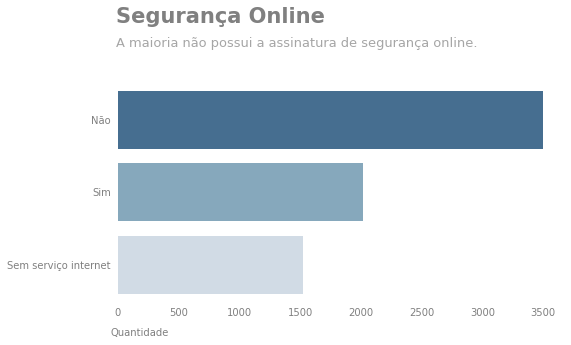

In [29]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(y='OnlineSecurity', data=df, saturation=0.5, order=df.OnlineSecurity.value_counts().index, palette='Blues_r', ax=ax)
ax.set_title('Segurança Online', color='#808080', x=0.23, y=1.25, size=21, fontweight='semibold')
ax.text(-18, -1,'A maioria não possui a assinatura de segurança online.', fontsize=13, color="#A6A6A6")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(colors="#808080", bottom=False, left=False)
ax.set_yticklabels(['Não', 'Sim', 'Sem serviço internet'])
ax.set_ylabel(ylabel='Segurança Online', y=0.75, visible=False, labelpad=10, color="#808080")
ax.set_xlabel(xlabel='Quantidade', x=0.05, labelpad=10, color='#808080')
plt.show()

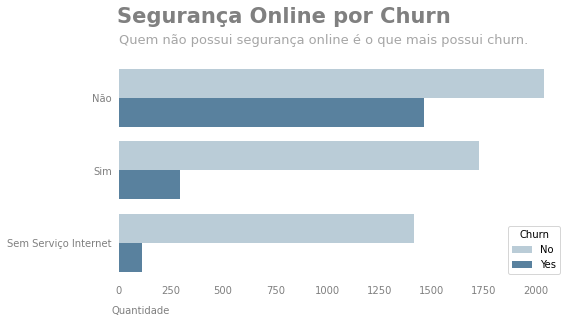

In [30]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(y='OnlineSecurity', data=df, saturation=0.5, palette='Blues', hue='Churn', ax=ax, order=df.OnlineSecurity.value_counts().index)
ax.set_title('Segurança Online por Churn', color='#808080', x=0.37, y=1.15, size=21, fontweight='semibold')
ax.text(0, -0.75,'Quem não possui segurança online é o que mais possui churn.', fontsize=13, color="#A6A6A6")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(colors="#808080", bottom=False, left=False)
ax.set_yticklabels(['Não', 'Sim', 'Sem Serviço Internet'])
ax.set_ylabel(ylabel='Segurança Online', visible=False, y=0.86, labelpad=10, color="#808080")
ax.set_xlabel(xlabel='Quantidade', x=0.05, labelpad=10, color='#808080')
plt.show()

### **Qual a distribuição da classe *backup online*?**

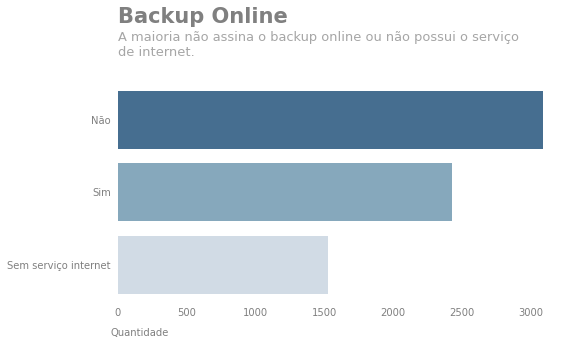

In [31]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(y='OnlineBackup', data=df, saturation=0.5, order=df.OnlineBackup.value_counts().index, palette='Blues_r', ax=ax)
ax.set_title('Backup Online', color='#808080', x=0.19, y=1.25, size=21, fontweight='semibold')
ax.text(0, -0.88,'A maioria não assina o backup online ou não possui o serviço\nde internet.', fontsize=13, color="#A6A6A6")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(colors="#808080", bottom=False, left=False)
ax.set_yticklabels(['Não', 'Sim', 'Sem serviço internet'])
ax.set_ylabel(ylabel='Backup Online', y=0.75, visible=False, labelpad=10, color="#808080")
ax.set_xlabel(xlabel='Quantidade', x=0.05, labelpad=10, color='#808080')
plt.show()

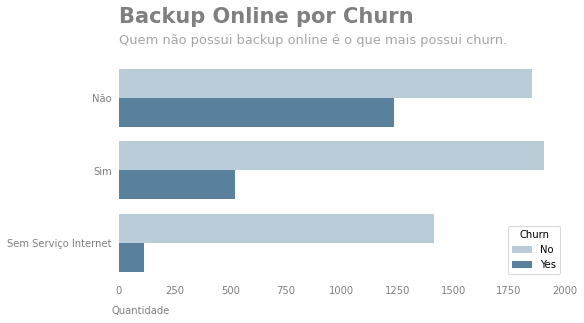

In [32]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(y='OnlineBackup', data=df, saturation=0.5, palette='Blues', hue='Churn', ax=ax, order=df.OnlineBackup.value_counts().index)
ax.set_title('Backup Online por Churn', color='#808080', x=0.33, y=1.15, size=21, fontweight='semibold')
ax.text(0, -0.75,'Quem não possui backup online é o que mais possui churn.', fontsize=13, color="#A6A6A6")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(colors="#808080", bottom=False, left=False)
ax.set_yticklabels(['Não', 'Sim', 'Sem Serviço Internet'])
ax.set_ylabel(ylabel='Backup Online', visible=False, y=0.86, labelpad=10, color="#808080")
ax.set_xlabel(xlabel='Quantidade', x=0.05, labelpad=10, color='#808080')
plt.show()

### **Qual a distribuição da classe *serviço de proteção do dispositivo*?**

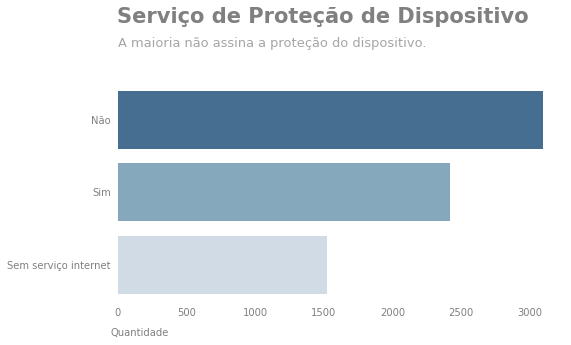

In [33]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(y='DeviceProtection', data=df, saturation=0.5, order=df.DeviceProtection.value_counts().index, palette='Blues_r', ax=ax)
ax.set_title('Serviço de Proteção de Dispositivo', color='#808080', x=0.46, y=1.25, size=21, fontweight='semibold')
ax.text(0, -1,'A maioria não assina a proteção do dispositivo.', fontsize=13, color="#A6A6A6")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(colors="#808080", bottom=False, left=False)
ax.set_yticklabels(['Não', 'Sim', 'Sem serviço internet'])
ax.set_ylabel(ylabel='Proteção Dispositivo', y=0.75, visible=False, labelpad=10, color="#808080")
ax.set_xlabel(xlabel='Quantidade', x=0.05, labelpad=10, color='#808080')
plt.show()

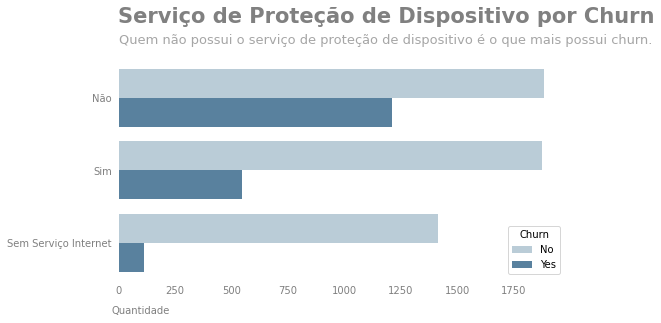

In [34]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(y='DeviceProtection', data=df, saturation=0.5, palette='Blues', hue='Churn', ax=ax, order=df.DeviceProtection.value_counts().index)
ax.set_title('Serviço de Proteção de Dispositivo por Churn', color='#808080', x=0.60, y=1.15, size=21, fontweight='semibold')
ax.text(0, -0.75,'Quem não possui o serviço de proteção de dispositivo é o que mais possui churn.', fontsize=13, color="#A6A6A6")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(colors="#808080", bottom=False, left=False)
ax.set_yticklabels(['Não', 'Sim', 'Sem Serviço Internet'])
ax.set_ylabel(ylabel='Backup Online', visible=False, y=0.86, labelpad=10, color="#808080")
ax.set_xlabel(xlabel='Quantidade', x=0.05, labelpad=10, color='#808080')
plt.show()

### **Qual a distribuição da classe *suporte técnico*?**

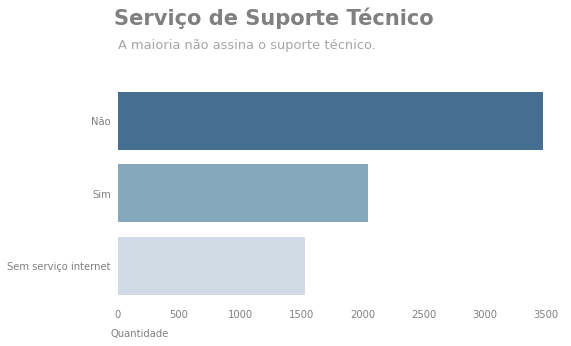

In [35]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(y='TechSupport', data=df, saturation=0.5, order=df.TechSupport.value_counts().index, palette='Blues_r', ax=ax)
ax.set_title('Serviço de Suporte Técnico', color='#808080', x=0.35, y=1.25, size=21, fontweight='semibold')
ax.text(0, -1,'A maioria não assina o suporte técnico.', fontsize=13, color="#A6A6A6")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(colors="#808080", bottom=False, left=False)
ax.set_yticklabels(['Não', 'Sim', 'Sem serviço internet'])
ax.set_ylabel(ylabel='Suporte Técnico', y=0.75, visible=False, labelpad=10, color="#808080")
ax.set_xlabel(xlabel='Quantidade', x=0.05, labelpad=10, color='#808080')
plt.show()

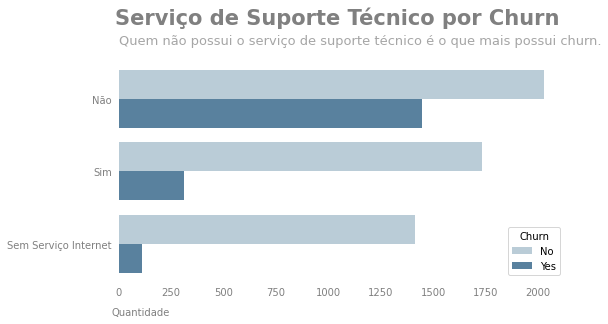

In [36]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(y='TechSupport', data=df, saturation=0.5, palette='Blues', hue='Churn', ax=ax, order=df.TechSupport.value_counts().index)
ax.set_title('Serviço de Suporte Técnico por Churn', color='#808080', x=0.49, y=1.15, size=21, fontweight='semibold')
ax.text(0, -0.75,'Quem não possui o serviço de suporte técnico é o que mais possui churn.', fontsize=13, color="#A6A6A6")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(colors="#808080", bottom=False, left=False)
ax.set_yticklabels(['Não', 'Sim', 'Sem Serviço Internet'])
ax.set_ylabel(ylabel='Suporte Técnico', visible=False, y=0.86, labelpad=10, color="#808080")
ax.set_xlabel(xlabel='Quantidade', x=0.05, labelpad=10, color='#808080')
plt.show()

### **Qual a distribuição da classe *streaming TV*?**

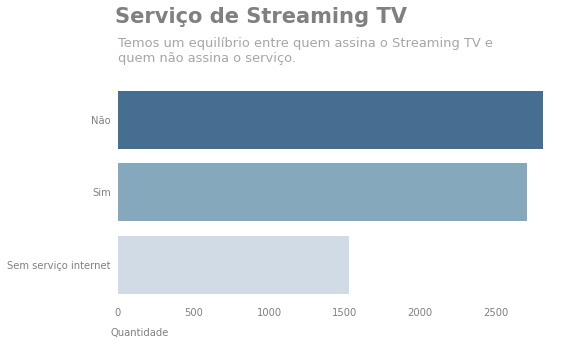

In [37]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(y='StreamingTV', data=df, saturation=0.5, order=df.StreamingTV.value_counts().index, palette='Blues_r', ax=ax)
ax.set_title('Serviço de Streaming TV', color='#808080', x=0.32, y=1.25, size=21, fontweight='semibold')
ax.text(0, -0.8,'Temos um equilíbrio entre quem assina o Streaming TV e\nquem não assina o serviço.', fontsize=13, color="#A6A6A6")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(colors="#808080", bottom=False, left=False)
ax.set_yticklabels(['Não', 'Sim', 'Sem serviço internet'])
ax.set_ylabel(ylabel='Streaming TV', y=0.75, visible=False, labelpad=10, color="#808080")
ax.set_xlabel(xlabel='Quantidade', x=0.05, labelpad=10, color='#808080')
plt.show()

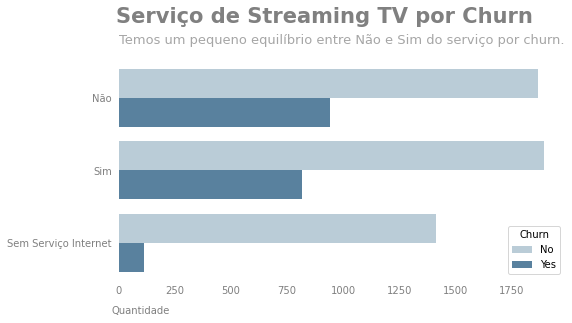

In [38]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(y='StreamingTV', data=df, saturation=0.5, palette='Blues', hue='Churn', ax=ax, order=df.StreamingTV.value_counts().index)
ax.set_title('Serviço de Streaming TV por Churn', color='#808080', x=0.46, y=1.15, size=21, fontweight='semibold')
ax.text(0, -0.75,'Temos um pequeno equilíbrio entre Não e Sim do serviço por churn.', fontsize=13, color="#A6A6A6")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(colors="#808080", bottom=False, left=False)
ax.set_yticklabels(['Não', 'Sim', 'Sem Serviço Internet'])
ax.set_ylabel(ylabel='Streaming TV', visible=False, y=0.86, labelpad=10, color="#808080")
ax.set_xlabel(xlabel='Quantidade', x=0.05, labelpad=10, color='#808080')
plt.show()

### **Qual a distribuição da classe *streaming filmes*?**

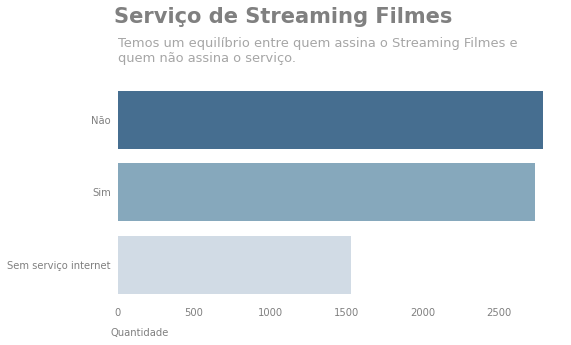

In [39]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(y='StreamingMovies', data=df, saturation=0.5, order=df.StreamingMovies.value_counts().index, palette='Blues_r', ax=ax)
ax.set_title('Serviço de Streaming Filmes', color='#808080', x=0.37, y=1.25, size=21, fontweight='semibold')
ax.text(0, -0.8,'Temos um equilíbrio entre quem assina o Streaming Filmes e\nquem não assina o serviço.', fontsize=13, color="#A6A6A6")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(colors="#808080", bottom=False, left=False)
ax.set_yticklabels(['Não', 'Sim', 'Sem serviço internet'])
ax.set_ylabel(ylabel='Streaming Filmes', y=0.75, visible=False, labelpad=10, color="#808080")
ax.set_xlabel(xlabel='Quantidade', x=0.05, labelpad=10, color='#808080')
plt.show()

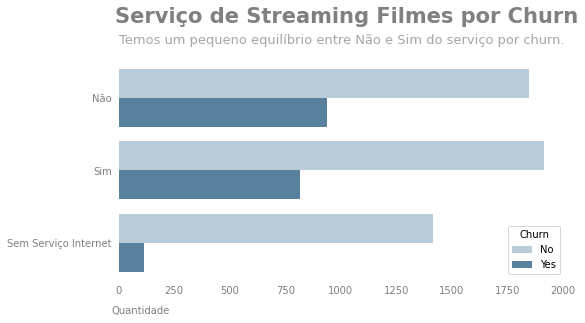

In [40]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(y='StreamingMovies', data=df, saturation=0.5, palette='Blues', hue='Churn', ax=ax, order=df.StreamingMovies.value_counts().index)
ax.set_title('Serviço de Streaming Filmes por Churn', color='#808080', x=0.51, y=1.15, size=21, fontweight='semibold')
ax.text(0, -0.75,'Temos um pequeno equilíbrio entre Não e Sim do serviço por churn.', fontsize=13, color="#A6A6A6")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(colors="#808080", bottom=False, left=False)
ax.set_yticklabels(['Não', 'Sim', 'Sem Serviço Internet'])
ax.set_ylabel(ylabel='Streaming Filmes', visible=False, y=0.86, labelpad=10, color="#808080")
ax.set_xlabel(xlabel='Quantidade', x=0.05, labelpad=10, color='#808080')
plt.show()

### **Qual a distribuição da classe *tipo de contrato*?**

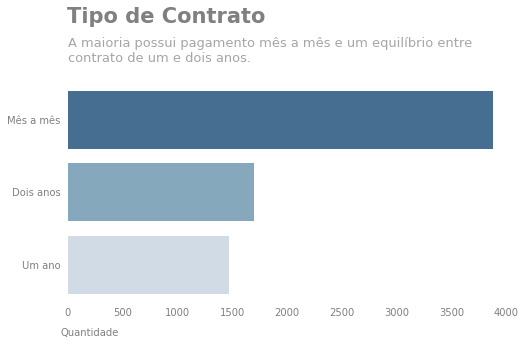

In [41]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(y='Contract', data=df, saturation=0.5, order=df.Contract.value_counts().index, palette='Blues_r', ax=ax)
ax.set_title('Tipo de Contrato', color='#808080', x=0.22, y=1.25, size=21, fontweight='semibold')
ax.text(0, -0.8,'A maioria possui pagamento mês a mês e um equilíbrio entre\ncontrato de um e dois anos.', fontsize=13, color="#A6A6A6")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(colors="#808080", bottom=False, left=False)
ax.set_yticklabels(['Mês a mês', 'Dois anos', 'Um ano'])
ax.set_ylabel(ylabel='Tipo Contrato', y=0.75, visible=False, labelpad=10, color="#808080")
ax.set_xlabel(xlabel='Quantidade', x=0.05, labelpad=10, color='#808080')
plt.show()

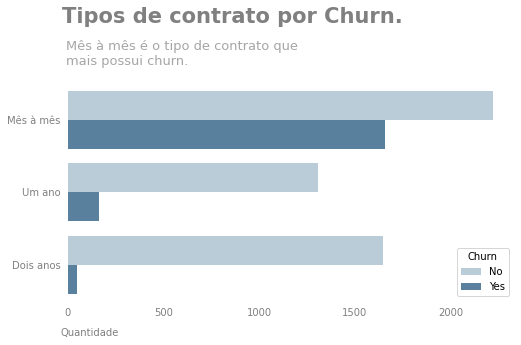

In [42]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(y='Contract', data=df, hue='Churn', saturation=0.5, palette='Blues', ax=ax, order=df[df.Churn=='Yes'].Contract.value_counts().index)
ax.set_title('Tipos de contrato por Churn.', color='#808080', x=0.37, y=1.25, size=21, fontweight='semibold')
ax.text(-10, -0.75,'Mês à mês é o tipo de contrato que\nmais possui churn.', fontsize=13, color="#A6A6A6")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_yticklabels(['Mês à mês', 'Um ano', 'Dois anos'])
ax.tick_params(colors="#808080", bottom=False, left=False)
ax.set_ylabel(ylabel='Contrato', visible=False, y=0.86, labelpad=10, color="#808080")
ax.set_xlabel(xlabel='Quantidade', x=0.05, labelpad=10, color='#808080')
plt.show()

### **Qual a distribuição da classe *tipo de pagamento*?**

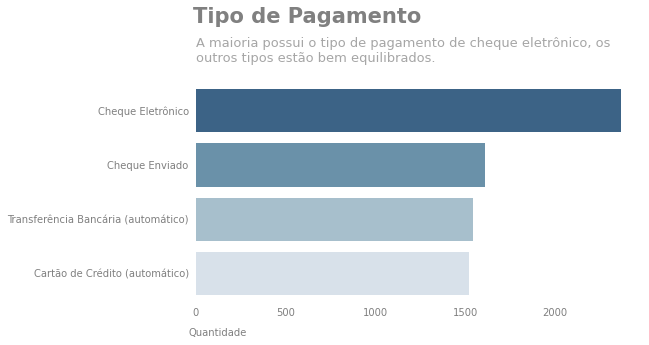

In [43]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(y='PaymentMethod', data=df, saturation=0.5, order=df.PaymentMethod.value_counts().index, palette='Blues_r', ax=ax)
ax.set_title('Tipo de Pagamento', color='#808080', x=0.25, y=1.25, size=21, fontweight='semibold')
ax.text(0, -0.9,'A maioria possui o tipo de pagamento de cheque eletrônico, os\noutros tipos estão bem equilibrados.', fontsize=13, color="#A6A6A6")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(colors="#808080", bottom=False, left=False)
ax.set_yticklabels(['Cheque Eletrônico', 'Cheque Enviado', 'Transferência Bancária (automático)', 'Cartão de Crédito (automático)'])
ax.set_ylabel(ylabel='Método Pagamento', y=0.75, visible=False, labelpad=10, color="#808080")
ax.set_xlabel(xlabel='Quantidade', x=0.05, labelpad=10, color='#808080')
plt.show()

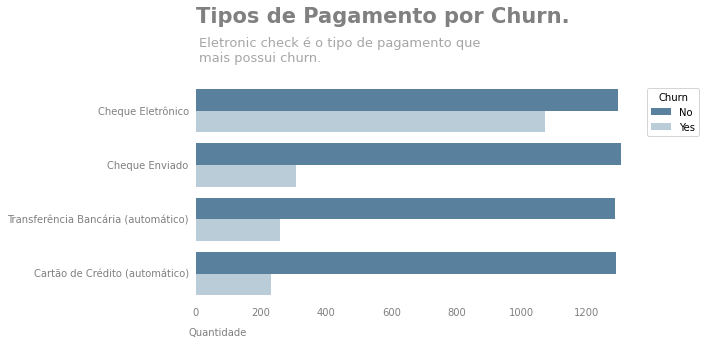

In [44]:
fig, ax = plt.subplots(figsize=(8,4))
sns.countplot(y='PaymentMethod', data=df, hue='Churn', saturation=0.5, palette='Blues_r', ax=ax, order=df.PaymentMethod.value_counts().index)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title('Tipos de Pagamento por Churn.', color='#808080', x=0.42, y=1.25, size=21, fontweight='semibold')
ax.text(10, -0.9,'Eletronic check é o tipo de pagamento que\nmais possui churn.', fontsize=13, color="#A6A6A6")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(colors="#808080", bottom=False, left=False)
ax.set_yticklabels(['Cheque Eletrônico', 'Cheque Enviado', 'Transferência Bancária (automático)', 'Cartão de Crédito (automático)'])
ax.set_ylabel(ylabel='Método de Pagamento', visible=False, y=0.86, labelpad=10, color="#808080")
ax.set_xlabel(xlabel='Quantidade', x=0.05, labelpad=10, color='#808080')
plt.show()

## **Análise Exploratória de Dados**

**Variáveis contínuas**

Analisando um pouco o recurso **TotalCharges**, percebemos que possuem valores com espaço em branco, e que todos estes em questão possuem o recurso **tenure** indicando que não passou nenhum mês na empresa. Isso nos dá indícios que podemos inserir um valor **zerado**.

### **Pré-processamento**

In [45]:
def convert_str_to_float(valor):
  '''
    Função responsável por converter uma string em um tipo float.
    Caso não seja possível converter, retornará um tipo NaN.
  '''
  try:
    return float(valor)
  except Exception as ex:
    return np.nan

In [46]:
df.TotalCharges = df.TotalCharges.apply(convert_str_to_float)

In [47]:
df.TotalCharges.isnull().sum()

11

In [48]:
mean_total_charges = df.TotalCharges.mean()
median_total_charges = df.TotalCharges.median()
print("Média:", mean_total_charges)
print("Mediana:", median_total_charges)

Média: 2283.3004408418656
Mediana: 1397.475


In [49]:
df.TotalCharges.fillna(0, inplace=True)

### **Qual a distribuição dos Custos Totais?**

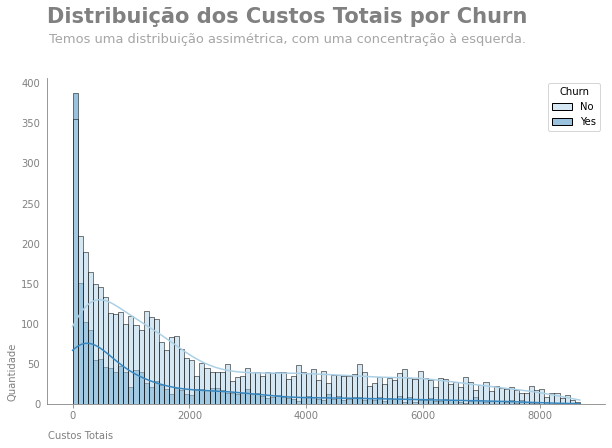

In [50]:
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(data=df, x=df.TotalCharges, hue='Churn', palette='Blues', kde=True, bins=100, ax=ax)
ax.set_title('Distribuição dos Custos Totais por Churn', color='#808080', x=0.43, y=1.15, size=21, fontweight='semibold')
ax.text(-400, 450,'Temos uma distribuição assimétrica, com uma concentração à esquerda.', fontsize=13, color="#A6A6A6")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#808080')
ax.spines['bottom'].set_color('#808080')

ax.tick_params(colors="#808080", left=False)
ax.set_xlabel(xlabel='Custos Totais', x=0.06, labelpad=10, color='#808080')
ax.set_ylabel('Quantidade', color='#808080', y=0.1)
plt.show()

### **Qual a distribuição do *número de meses na empresa*?**

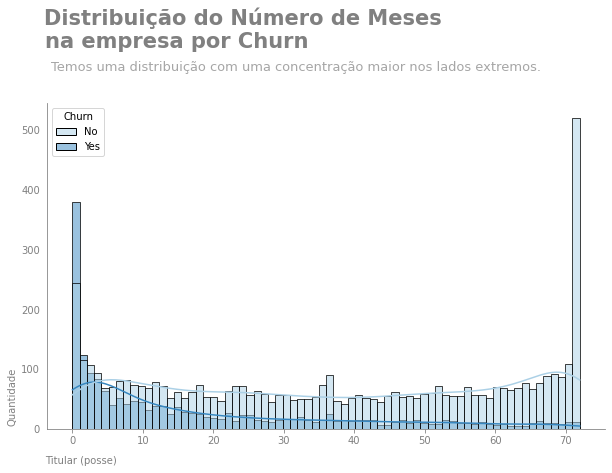

In [69]:
fig, ax = plt.subplots(figsize=(10,6))
sns.histplot(data=df, x=df.tenure, hue='Churn', palette='Blues', kde=True, bins=70, ax=ax)
ax.set_title('Distribuição do Número de Meses\nna empresa por Churn'+18*' ', color='#808080', x=0.35, y=1.15, size=21, fontweight='semibold')
ax.text(-3, 600,'Temos uma distribuição com uma concentração maior nos lados extremos.', fontsize=13, color="#A6A6A6")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#808080')
ax.spines['bottom'].set_color('#808080')

ax.tick_params(colors="#808080", left=False)
ax.set_xlabel(xlabel='Titular (posse)', x=0.06, labelpad=10, color='#808080')
ax.set_ylabel('Quantidade', color='#808080', y=0.1)
plt.show()

### **Qual a distribuição do KDE das *Cobranças Mensais*?**

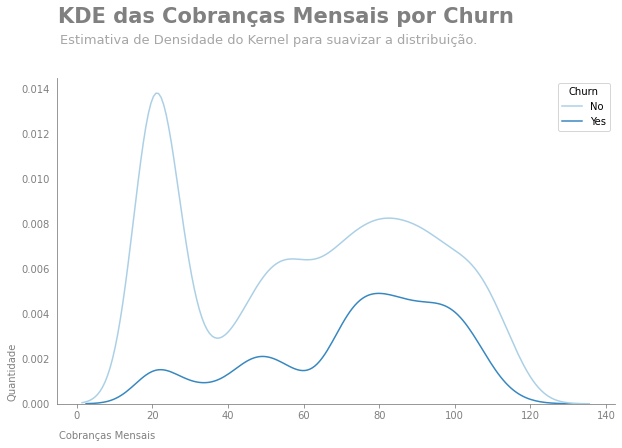

In [70]:
fig, ax = plt.subplots(figsize=(10,6))
sns.kdeplot(data=df, x=df.MonthlyCharges, hue='Churn', palette='Blues', ax=ax)
ax.set_title('KDE das Cobranças Mensais por Churn', color='#808080', x=0.41, y=1.15, size=21, fontweight='semibold')
ax.text(-4.5, 0.016,'Estimativa de Densidade do Kernel para suavizar a distribuição.', fontsize=13, color="#A6A6A6")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#808080')
ax.spines['bottom'].set_color('#808080')

ax.tick_params(colors="#808080", left=False)
ax.set_xlabel(xlabel='Cobranças Mensais', x=0.09, labelpad=10, color='#808080')
ax.set_ylabel('Quantidade', color='#808080', y=0.1)
plt.show()

## Referências

https://resultadosdigitais.com.br/marketing/o-que-e-churn/